In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [21]:
#ensemble learning: bagging, boosting and stacking
#examples: bagging-random forest, boosting-adaboost 

In [22]:
#RandomForestClassifier parameters:
#n_estimators - number of estimators


In [23]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [24]:
wine.data.shape

(178, 13)

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [26]:
clf = DecisionTreeClassifier(random_state=30)
rfc = RandomForestClassifier(random_state=30)

clf.fit(xtrain,ytrain)
rfc.fit(xtrain,ytrain)

score_c = clf.score(xtest,ytest)
score_r = rfc.score(xtest,ytest)

print("single tree:{}".format(score_c))
print("random forest:{}".format(score_r))


single tree:0.9074074074074074
random forest:0.9444444444444444


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


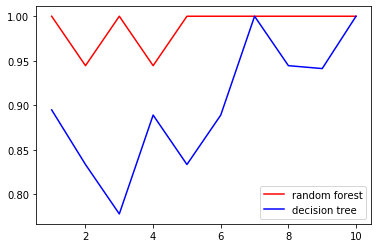

In [27]:
# cross validation
rfc = RandomForestClassifier(n_estimators=25)
scores_rfc = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
scores_clf = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),scores_rfc,c='red',label="random forest")
plt.plot(range(1,11),scores_clf,c='blue',label="decision tree")
plt.legend()
plt.show()

In [28]:
#learning curve for n_estimator
superpa = []
for i in range(50):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    score = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    superpa.append(score)

The max of scores: 0.989
The corresponding n_estimator: 24


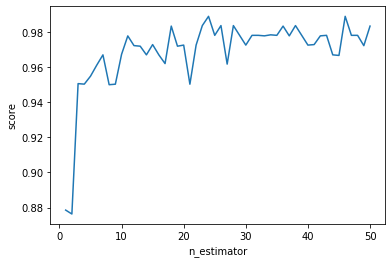

In [32]:
print("The max of scores: {maxs:.3f}\nThe corresponding n_estimator: {maxn}".format(maxs=max(superpa), maxn = 1+superpa.index(max(superpa))))
plt.figure()
plt.plot(range(1,51),superpa)
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.show()

In [36]:
# random_state in RandomForestClassifier fix a forest;however, we have different trees in this forest
# important attributes: estimators_ - a list including all trees in the generated forest
rfc = RandomForestClassifier(n_estimators = 24, random_state=20)
rfc.fit(wine.data,wine.target)

for estimator in rfc.estimators_:
    print(estimator.random_state)

378518883
1663920602
1708167439
1951685855
1681611676
1942519002
1356511625
521790868
154144587
602822422
823592519
1934675106
1626422240
742452342
79503912
176838101
678396378
1467049754
832580347
1359590355
1169590032
1213377277
938905318
1010465510


In [39]:
#important parameters: bootstrap = True by default
# oob_score - to use the data out of bad to test the accuracy of the model
# when n is large, we don't need to split the data in to training and test sets
# we can use the oob(out-of-bag) data to test the model
rfc = RandomForestClassifier(n_estimators=24,oob_score=True)
rfc.fit(wine.data,wine.target)
rfc.oob_score_ 

0.9775280898876404

In [40]:
#Summary
#parameters: n_estimators, random_state, bootstrap, oob_score
#attributes: estimators_, oob_score_,feature_importances_
#methods: apply, fit, predict, score, predict_proba

In [41]:
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

0.9814814814814815

In [43]:
[*zip(wine.feature_names,rfc.feature_importances_)]

[('alcohol', 0.15267895614099106),
 ('malic_acid', 0.035762935598661526),
 ('ash', 0.006631616354149947),
 ('alcalinity_of_ash', 0.020520034005999846),
 ('magnesium', 0.020047837399508727),
 ('total_phenols', 0.038789680209378466),
 ('flavanoids', 0.23538228715899628),
 ('nonflavanoid_phenols', 0.013943465929603499),
 ('proanthocyanins', 0.013995250695819791),
 ('color_intensity', 0.1318731384076857),
 ('hue', 0.06492736063636582),
 ('od280/od315_of_diluted_wines', 0.08742346567867752),
 ('proline', 0.1780239717841618)]

In [48]:
#apply - which leaf the sample belongs to 
print(rfc.apply(xtest))
rfc.apply(xtest).shape

[[ 5  7  4 ...  7  9  5]
 [ 9  7  6 ...  4  7 16]
 [14  7  6 ...  4  7 16]
 ...
 [11  4  4 ...  7  4  8]
 [ 7  7  6 ...  4  7  4]
 [11  4  4 ...  3  4  6]]


(54, 25)

In [45]:
rfc.predict(xtest)

array([2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2,
       2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0,
       0, 1, 0, 0, 2, 1, 1, 2, 1, 2])

In [46]:
rfc.predict_proba(xtest) 

array([[0.  , 0.36, 0.64],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.16, 0.84],
       [0.  , 0.32, 0.68],
       [0.  , 1.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.8 , 0.2 , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.72, 0.28, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.04, 0.48, 0.48],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.8 , 0.16],
       [0.  , 0.92, 0.08],
       [0.8 , 0.2 , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.92, 0.08, 0.  ],
       [0.08, 0.92, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.92, 0.04, 0.04],
       [0.  , 1.  , 0.  ],
       [0.04, 0.  , 0.96],
       [0.92, 0.08, 0.  ],
       [0.12, 0.84, 0.04],
       [0.84, 0.12, 0.04],
       [0.28, 0.72, 0.  ],
       [0.08, 0.8 , 0.12],
       [0.12, 0.56, 0.32],
 